In [1]:
import os
os.getcwd()

'C:\\Users\\GLNB\\Desktop\\UNI-Essex-MSc-AI\\3.Machine-Learning-ML_PCOM7E\\archive'

Importing all required packages into the python environment

In [2]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import scipy.stats as st
import sklearn
from sklearn.cross_validation import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
import missingno as msno
from math import radians

C:\Users\GLNB\Anaconda3\lib\distutils\__init__.py:14: UserWarning: The virtualenv distutils package at %s appears to be in the same location as the system distutils?
  warnings.warn("The virtualenv distutils package at %s appears to be in the same location as the system distutils?")


Reading/importing the data

In [3]:
MainData = pd.read_csv("AB_NYC_2019.csv")

One of the most elementary steps to do this is by getting a basic description of your data. A basic description of your data
is indeed a very broad term: you can interpret it as a quick and dirty way to get some information on your data, as a way of
getting some simple, easy-to-understand information on your data, to get a basic feel for your data. We can use the describe()
function to get various summary statistics of the data.

In [4]:
MainData.describe()

C:\Users\GLNB\Anaconda3\lib\site-packages\numpy\lib\function_base.py:3652: RuntimeWarning: Invalid value encountered in percentile
  interpolation=interpolation)


,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.889500e+04,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,38843.000000,48895.000000,48895.000000
mean,1.901714e+07,6.762001e+07,40.728949,-73.952170,152.720687,7.029962,23.274466,1.373221,7.143982,112.781327
std,1.098311e+07,7.861097e+07,0.054530,0.046157,240.154170,20.510550,44.550582,1.680442,32.952519,131.622289
min,2.539000e+03,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,9.471945e+06,7.822033e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,NaN,1.000000,0.000000
50%,1.967728e+07,3.079382e+07,40.723070,-73.955680,106.000000,3.000000,5.000000,NaN,1.000000,45.000000
75%,2.915218e+07,1.074344e+08,40.763115,-73.936275,175.000000,5.000000,24.000000,NaN,2.000000,227.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


Using head() and tail() functions to get a closer look at the data.

In [5]:
MainData.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [6]:
MainData.tail()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
48890,36484665,Charming one bedroom - newly renovated rowhouse,8232441,Sabrina,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70,2,0,NaN,NaN,2,9
48891,36485057,Affordable room in Bushwick/East Williamsburg,6570630,Marisol,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40,4,0,NaN,NaN,2,36
48892,36485431,Sunny Studio at Historical Neighborhood,23492952,Ilgar & Aysel,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115,10,0,NaN,NaN,1,27
48893,36485609,43rd St. Time Square-cozy single bed,30985759,Taz,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55,1,0,NaN,NaN,6,2
48894,36487245,Trendy duplex in the very heart of Hell's Kitchen,68119814,Christophe,Manhattan,Hell's Kitchen,40.76404,-73.98933,Private room,90,7,0,NaN,NaN,1,23


In [7]:
MainData.shape

(48895, 16)

Numerical columns exploration

In [8]:
numeric_features = MainData.select_dtypes(include=[np.number])
numeric_features

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,2787,40.64749,-73.97237,149,1,9,0.21,6,365
1,2595,2845,40.75362,-73.98377,225,1,45,0.38,2,355
2,3647,4632,40.80902,-73.94190,150,3,0,NaN,1,365
3,3831,4869,40.68514,-73.95976,89,1,270,4.64,1,194
4,5022,7192,40.79851,-73.94399,80,10,9,0.10,1,0
5,5099,7322,40.74767,-73.97500,200,3,74,0.59,1,129
6,5121,7356,40.68688,-73.95596,60,45,49,0.40,1,0
7,5178,8967,40.76489,-73.98493,79,2,430,3.47,1,220
8,5203,7490,40.80178,-73.96723,79,2,118,0.99,1,0
9,5238,7549,40.71344,-73.99037,150,1,160,1.33,4,188


Categorical columns exploration

In [9]:
categorical_features = MainData.select_dtypes(include=[np.object])
categorical_features

,name,host_name,neighbourhood_group,neighbourhood,room_type,last_review
0,Clean & quiet apt home by the park,John,Brooklyn,Kensington,Private room,2018-10-19
1,Skylit Midtown Castle,Jennifer,Manhattan,Midtown,Entire home/apt,2019-05-21
2,THE VILLAGE OF HARLEM....NEW YORK !,Elisabeth,Manhattan,Harlem,Private room,NaN
3,Cozy Entire Floor of Brownstone,LisaRoxanne,Brooklyn,Clinton Hill,Entire home/apt,2019-07-05
4,Entire Apt: Spacious Studio/Loft by central park,Laura,Manhattan,East Harlem,Entire home/apt,2018-11-19
5,Large Cozy 1 BR Apartment In Midtown East,Chris,Manhattan,Murray Hill,Entire home/apt,2019-06-22
6,BlissArtsSpace!,Garon,Brooklyn,Bedford-Stuyvesant,Private room,2017-10-05
7,Large Furnished Room Near B'way,Shunichi,Manhattan,Hell's Kitchen,Private room,2019-06-24
8,Cozy Clean Guest Room - Family Apt,MaryEllen,Manhattan,Upper West Side,Private room,2017-07-21
9,Cute & Cozy Lower East Side 1 bdrm,Ben,Manhattan,Chinatown,Entire home/apt,2019-06-09


Missing objects exploration

In [10]:
MainData.isnull().sum()

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

The Below code gives a matrix representation of missing values that are present in a few columns of the data

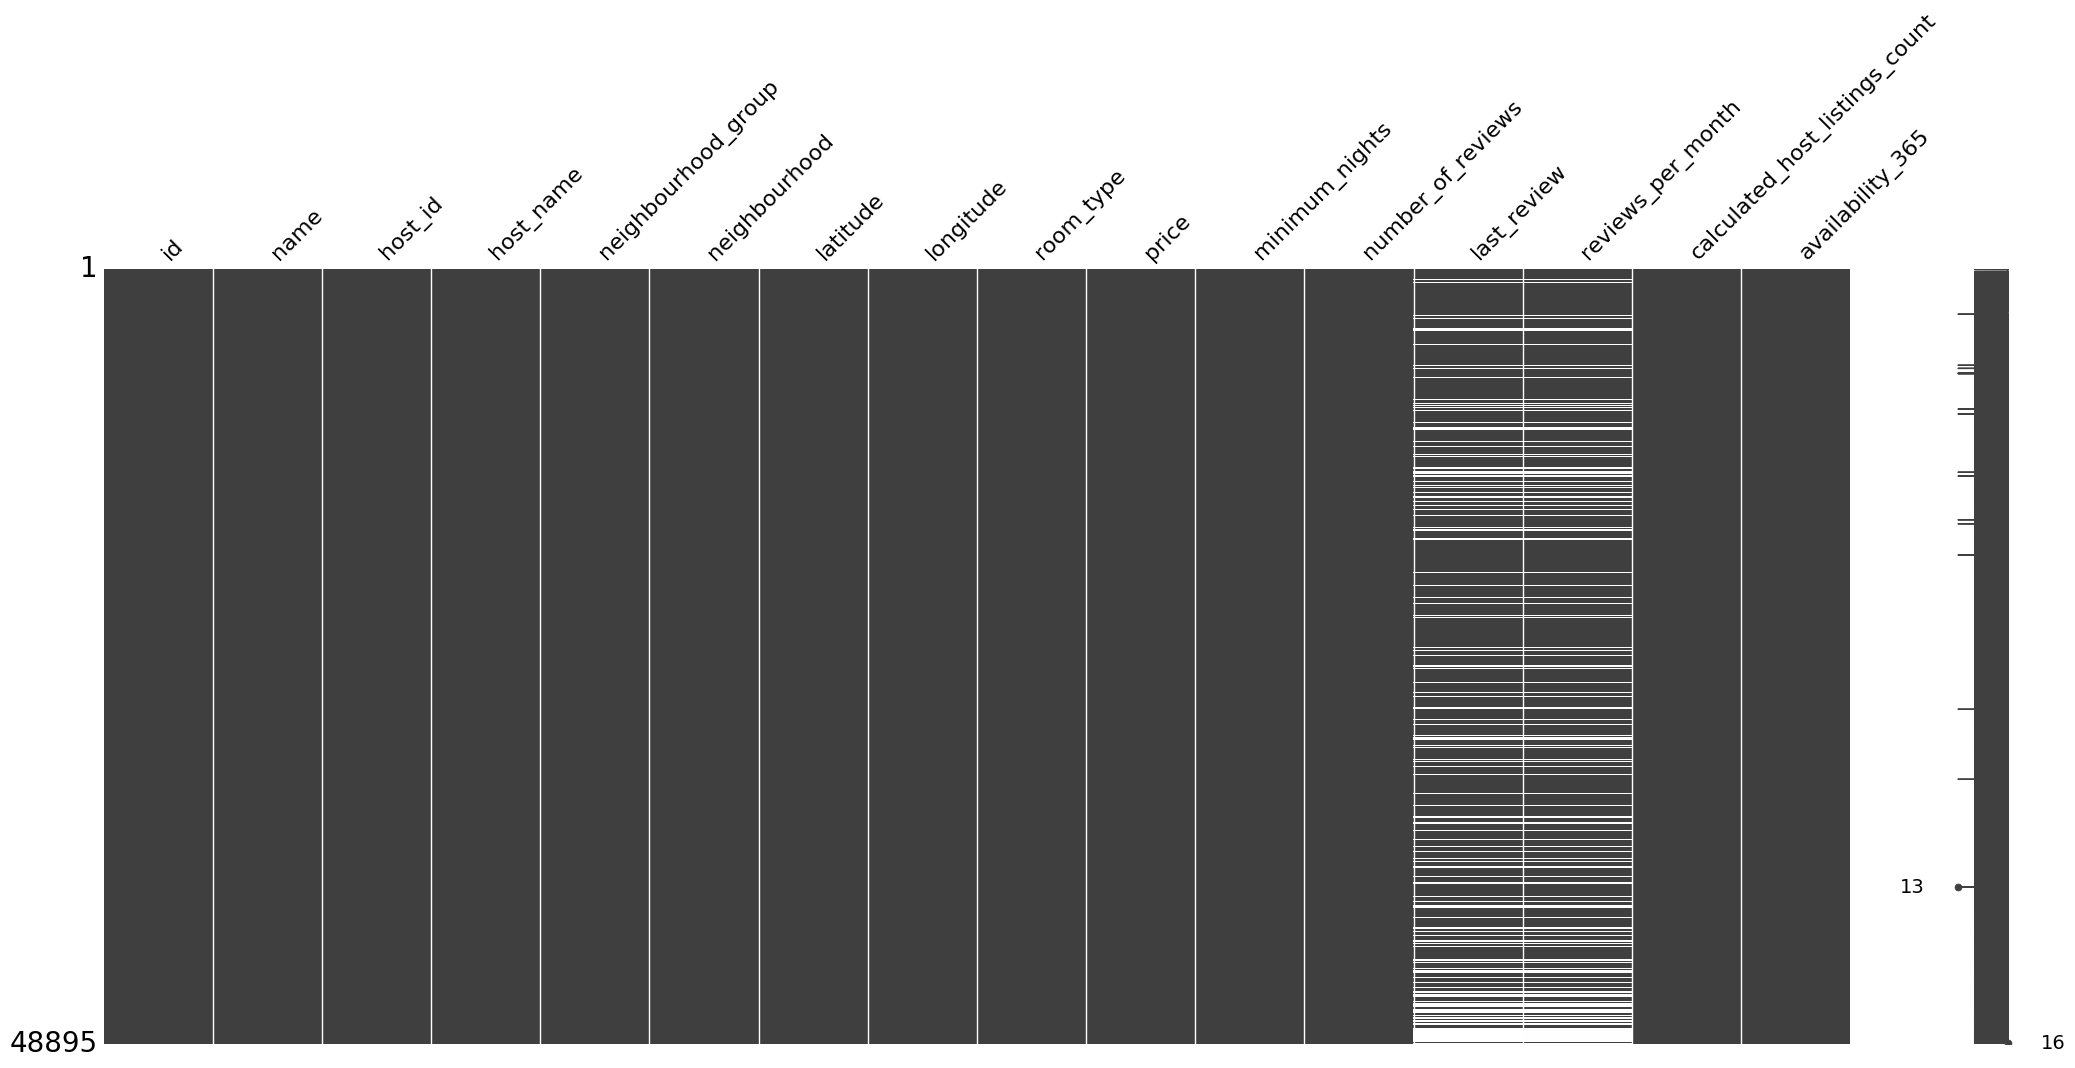

In [11]:
msno.matrix(MainData)

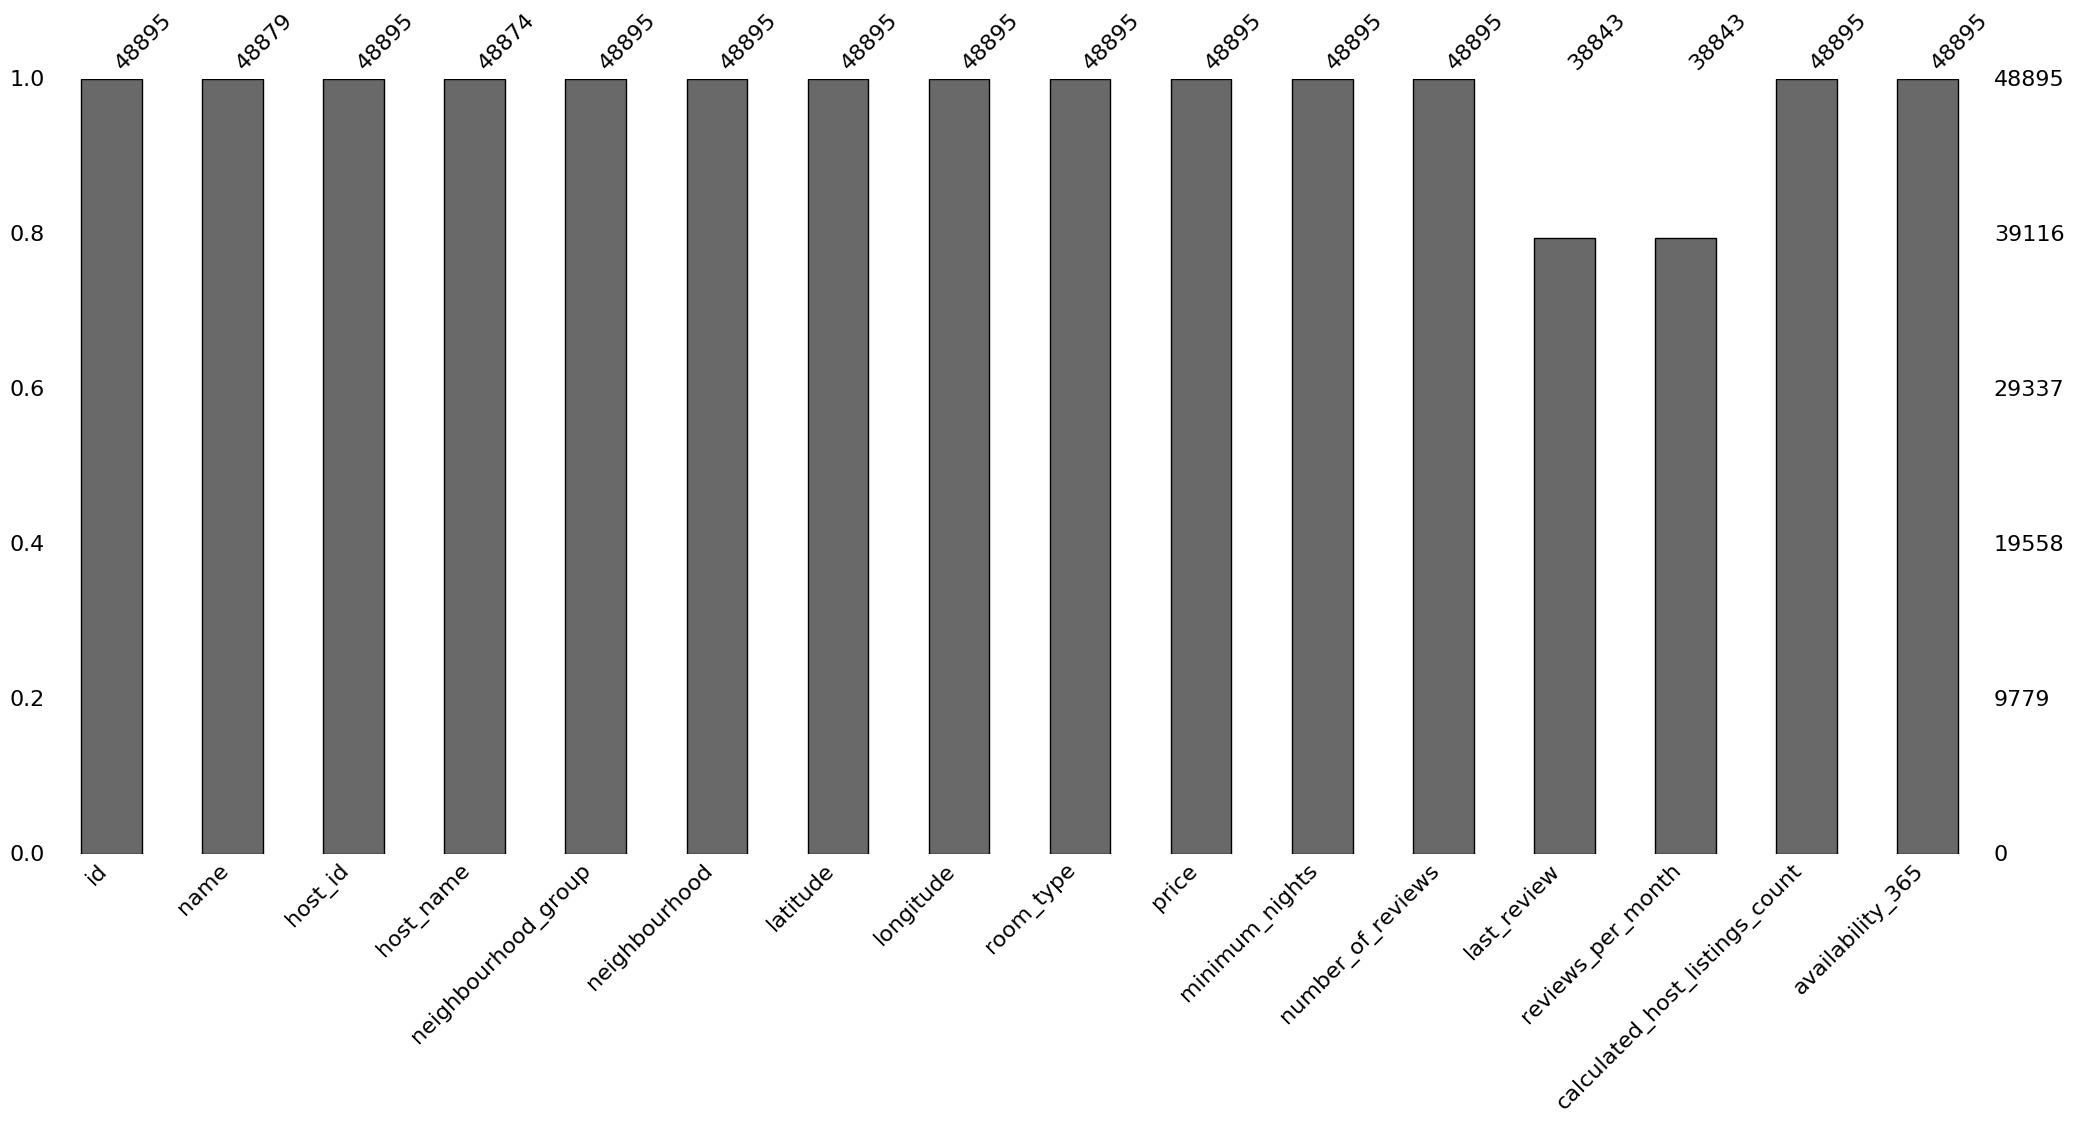

In [12]:
msno.bar(MainData)

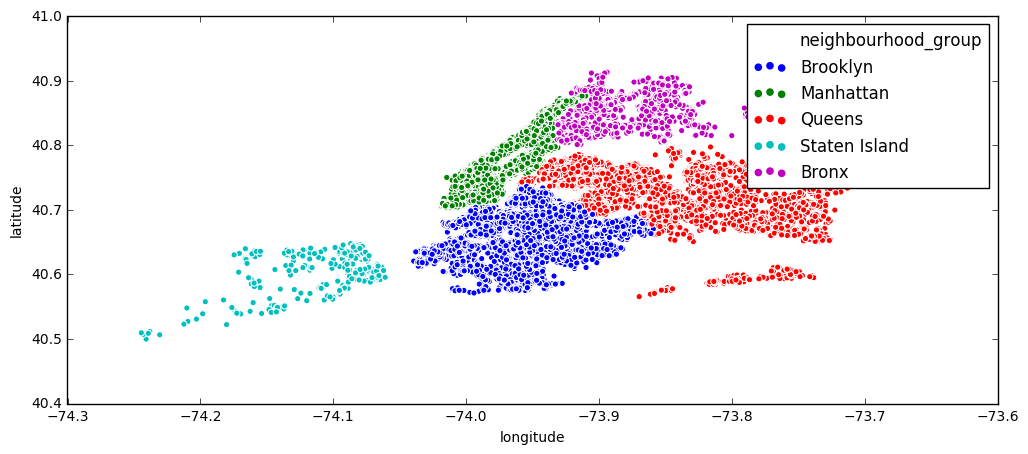

In [13]:
plt.figure(figsize=(12,5))
sns.scatterplot(x = MainData['longitude'], y = MainData['latitude'], hue = MainData['neighbourhood_group'])
plt.show()

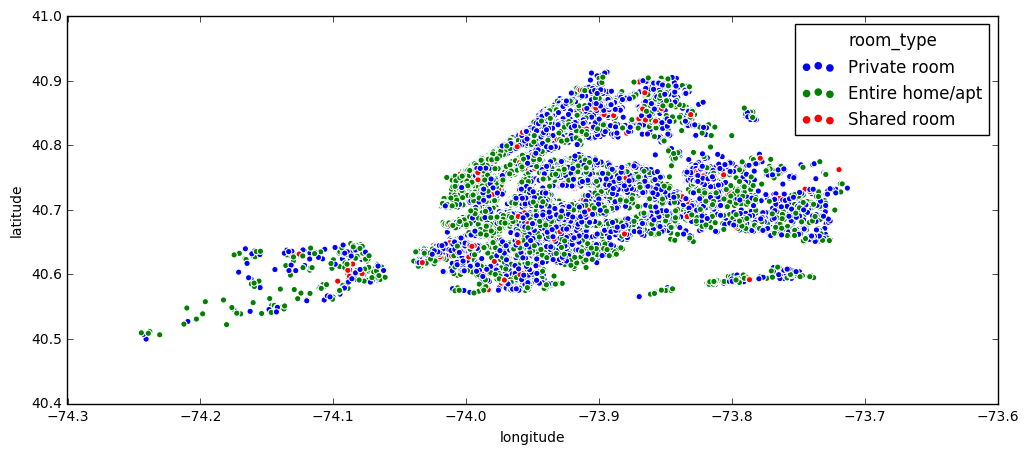

In [14]:
plt.figure(figsize=(12,5))
sns.scatterplot(x = MainData['longitude'], y = MainData['latitude'], hue = MainData['room_type'])
plt.show()

Dealing with missing va,ues in the data.

In [15]:
MainData['reviews_per_month']= MainData['reviews_per_month'].fillna(MainData['reviews_per_month'].mean())
MainData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
id                                48895 non-null int64
name                              48879 non-null object
host_id                           48895 non-null int64
host_name                         48874 non-null object
neighbourhood_group               48895 non-null object
neighbourhood                     48895 non-null object
latitude                          48895 non-null float64
longitude                         48895 non-null float64
room_type                         48895 non-null object
price                             48895 non-null int64
minimum_nights                    48895 non-null int64
number_of_reviews                 48895 non-null int64
last_review                       38843 non-null object
reviews_per_month                 48895 non-null float64
calculated_host_listings_count    48895 non-null int64
availability_365                  48895 non-null int64

In [16]:
MainData

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.210000,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.380000,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,1.373221,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.640000,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.100000,1,0
5,5099,Large Cozy 1 BR Apartment In Midtown East,7322,Chris,Manhattan,Murray Hill,40.74767,-73.97500,Entire home/apt,200,3,74,2019-06-22,0.590000,1,129
6,5121,BlissArtsSpace!,7356,Garon,Brooklyn,Bedford-Stuyvesant,40.68688,-73.95596,Private room,60,45,49,2017-10-05,0.400000,1,0
7,5178,Large Furnished Room Near B'way,8967,Shunichi,Manhattan,Hell's Kitchen,40.76489,-73.98493,Private room,79,2,430,2019-06-24,3.470000,1,220
8,5203,Cozy Clean Guest Room - Family Apt,7490,MaryEllen,Manhattan,Upper West Side,40.80178,-73.96723,Private room,79,2,118,2017-07-21,0.990000,1,0
9,5238,Cute & Cozy Lower East Side 1 bdrm,7549,Ben,Manhattan,Chinatown,40.71344,-73.99037,Entire home/apt,150,1,160,2019-06-09,1.330000,4,188


In [17]:
MainData.isnull().sum()

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                     0
calculated_host_listings_count        0
availability_365                      0
dtype: int64

In [18]:
def plotCorrelationMatrix(df, graphWidth):
    filename = df.dataframeName
    df = df.dropna('columns') # drop columns with NaN
    df = df[[col for col in df if df[col].nunique() > 1]] # keep columns where there are more than 1 unique values
    if df.shape[1] < 2:
        print('No correlation plots shown: The number of non-NaN or constant columns ({df.shape[1]}) is less than 2')
        return
    corr = df.corr()
    plt.figure(num=None, figsize=(graphWidth, graphWidth), dpi=80, facecolor='w', edgecolor='k')
    corrMat = plt.matshow(corr, fignum = 1)
    plt.xticks(range(len(corr.columns)), corr.columns, rotation=90)
    plt.yticks(range(len(corr.columns)), corr.columns)
    plt.gca().xaxis.tick_bottom()
    plt.colorbar(corrMat)
    plt.title('Correlation Matrix for AB_NYC_2019', fontsize=15)
    plt.show()

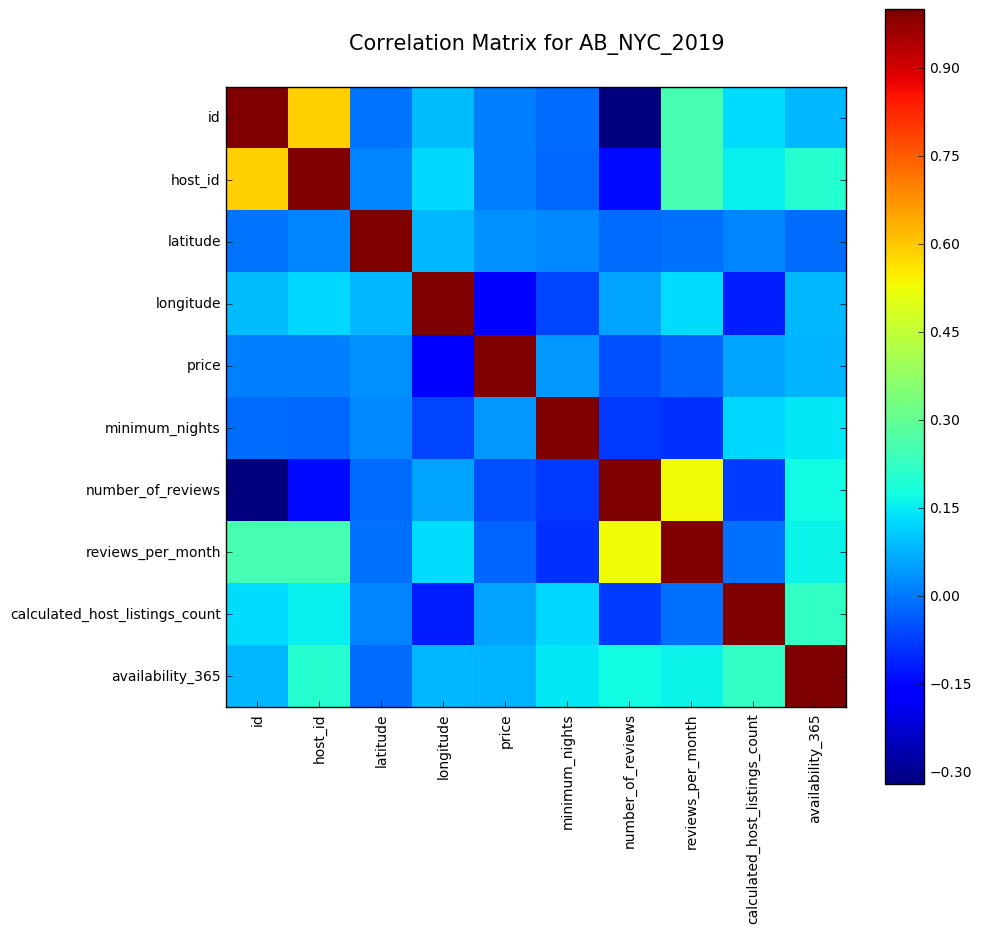

In [19]:
MainData.dataframeName = 'AB_NYC_2019.csv'
plotCorrelationMatrix(MainData,10)

In [20]:
MainData.isnull().sum()

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                     0
calculated_host_listings_count        0
availability_365                      0
dtype: int64

In [21]:
MainData= MainData.drop('last_review', axis=1)
MainData

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,0.210000,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,0.380000,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,1.373221,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,4.640000,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,0.100000,1,0
5,5099,Large Cozy 1 BR Apartment In Midtown East,7322,Chris,Manhattan,Murray Hill,40.74767,-73.97500,Entire home/apt,200,3,74,0.590000,1,129
6,5121,BlissArtsSpace!,7356,Garon,Brooklyn,Bedford-Stuyvesant,40.68688,-73.95596,Private room,60,45,49,0.400000,1,0
7,5178,Large Furnished Room Near B'way,8967,Shunichi,Manhattan,Hell's Kitchen,40.76489,-73.98493,Private room,79,2,430,3.470000,1,220
8,5203,Cozy Clean Guest Room - Family Apt,7490,MaryEllen,Manhattan,Upper West Side,40.80178,-73.96723,Private room,79,2,118,0.990000,1,0
9,5238,Cute & Cozy Lower East Side 1 bdrm,7549,Ben,Manhattan,Chinatown,40.71344,-73.99037,Entire home/apt,150,1,160,1.330000,4,188


In [22]:
MainData['latitude'] = MainData['latitude'].apply(radians)
MainData['longitude'] = MainData['longitude'].apply(radians)

In [23]:
MainData

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,0.709433,-1.291061,Private room,149,1,9,0.210000,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,0.711285,-1.291260,Entire home/apt,225,1,45,0.380000,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,0.712252,-1.290530,Private room,150,3,0,1.373221,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,0.710090,-1.290841,Entire home/apt,89,1,270,4.640000,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,0.712068,-1.290566,Entire home/apt,80,10,9,0.100000,1,0
5,5099,Large Cozy 1 BR Apartment In Midtown East,7322,Chris,Manhattan,Murray Hill,0.711181,-1.291107,Entire home/apt,200,3,74,0.590000,1,129
6,5121,BlissArtsSpace!,7356,Garon,Brooklyn,Bedford-Stuyvesant,0.710120,-1.290775,Private room,60,45,49,0.400000,1,0
7,5178,Large Furnished Room Near B'way,8967,Shunichi,Manhattan,Hell's Kitchen,0.711482,-1.291281,Private room,79,2,430,3.470000,1,220
8,5203,Cozy Clean Guest Room - Family Apt,7490,MaryEllen,Manhattan,Upper West Side,0.712125,-1.290972,Private room,79,2,118,0.990000,1,0
9,5238,Cute & Cozy Lower East Side 1 bdrm,7549,Ben,Manhattan,Chinatown,0.710584,-1.291376,Entire home/apt,150,1,160,1.330000,4,188


In [24]:
MainNumericData= MainData.select_dtypes(include=[np.number])

In [25]:
MainNumericData.isnull().sum()

id                                0
host_id                           0
latitude                          0
longitude                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
dtype: int64

In [26]:
MainNumericDataLM= MainNumericData.drop(['id', 'host_id'], axis=1)

In [27]:
MainNumericDataLM.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 8 columns):
latitude                          48895 non-null float64
longitude                         48895 non-null float64
price                             48895 non-null int64
minimum_nights                    48895 non-null int64
number_of_reviews                 48895 non-null int64
reviews_per_month                 48895 non-null float64
calculated_host_listings_count    48895 non-null int64
availability_365                  48895 non-null int64
dtypes: float64(3), int64(5)
memory usage: 3.0 MB


In [28]:
x_NumericMainData= MainNumericDataLM.drop('price',axis=1)
x_NumericMainData

,latitude,longitude,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,0.709433,-1.291061,1,9,0.210000,6,365
1,0.711285,-1.291260,1,45,0.380000,2,355
2,0.712252,-1.290530,3,0,1.373221,1,365
3,0.710090,-1.290841,1,270,4.640000,1,194
4,0.712068,-1.290566,10,9,0.100000,1,0
5,0.711181,-1.291107,3,74,0.590000,1,129
6,0.710120,-1.290775,45,49,0.400000,1,0
7,0.711482,-1.291281,2,430,3.470000,1,220
8,0.712125,-1.290972,2,118,0.990000,1,0
9,0.710584,-1.291376,1,160,1.330000,4,188


In [29]:
y_NumericMainData= MainNumericDataLM['price']
y_NumericMainData

0        149
1        225
2        150
3         89
4         80
5        200
6         60
7         79
8         79
9        150
10       135
11        85
12        89
13        85
14       120
15       140
16       215
17       140
18        99
19       190
20       299
21       130
22        80
23       110
24       120
25        60
26        80
27       150
28        44
29       180
        ... 
48865     80
48866     58
48867     25
48868     25
48869     45
48870     99
48871     35
48872    260
48873    170
48874     50
48875    140
48876     60
48877     42
48878     45
48879    120
48880    120
48881     54
48882     40
48883     75
48884    190
48885     75
48886    200
48887    170
48888    125
48889     65
48890     70
48891     40
48892    115
48893     55
48894     90
Name: price, dtype: int64

In [30]:
X_train, X_test, y_train, y_test = train_test_split(x_NumericMainData, y_NumericMainData, test_size = 0.25)
  


In [31]:
regr = LinearRegression()
regr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [32]:
print(regr.intercept_, regr.coef_,regr.score(X_test, y_test))

-69524.39099196208 [ 1.17471260e+04 -4.74993532e+04  9.69295395e-02 -3.45377769e-01
  3.37342020e+00  9.68040529e-02  1.80034291e-01] 0.04020633136647589


In [41]:
KNNregr= KNeighborsRegressor(weights='distance')
KNNregr.fit(X_train, y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=1, n_neighbors=5, p=2,
          weights='distance')

In [42]:
print(KNNregr.score(X_test, y_test))

-0.2023352278558619


In [39]:
KNNregr.

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=1, n_neighbors=5, p=2,
          weights='uniform')